# Homework 2 Part 1 - Graph Visualization

#### Austin Chan, Justin Herman, Chester Poon, Deepak Mongia, Michael O'Donnell


### Introduction

For this assignment, we analyzed the trophic biomass transfers between different organism groups in the Florida Everglades. To understand this network, it is important to cover a little bit of ecology first. Trophic biomass transfer refers to the transfer of energy between living organisms within an ecosystem. The primary source of energy for producers, like plants and algae, comes from the sun. These plants and algae use the sun's energy to produce simple sugars to grow. Primary consumers, like snails and herbivorous fish, eat the plants and algae, which results in energy transfer from the primary producers to the primary consumers. Above the primary consumers are predators, like otters and snakes, that eat the primary consumers. Above the predators are the apex predators, like alligators and bears, that eat primary consumers and other smaller predators. When organisms die and their remains are left on the ground, decomposers come in to break down the scraps and produce useful nutrients for the primary producers to use for growth, completing the food cycle.

In this (oversimplified) description of the food cycle, the transfer of energy is very linear. Producers are eaten by primary consumers, which are eaten by predators, which are eaten by apex predators, which are broken down by decomposers. In reality, trophic biomass transfer is more like a web, or a network, where many organisms feed on a variety of other organisms in varying degrees. This data shows the biomass transfer relationships between different wildlife species in the Florida Everglades. Some species that perform very similar functions, like terrestrial invertebrates (bugs), phytoplankton (water organisms that produce energy through the sun), and small herbivorous fish have been grouped together into their own group nodes. (One node for all bugs, one node for all phytoplankton, and one node for all small herbivorous fish.) This makes the analysis much less cluttered and removes a lot of the noise that can pollute the underlying patterns in the data.

All that being said, let's jump into the data.

### Loading the Necessary Packages

The first step to analyzing this network is to import the packages necessary for the analysis. The first package we imported is networkx. This package provides a comprehensive framework for loading, processing, and analyzing network data in python. The second package we used is matplotlib. This package is useful for displaying plots and figures in the python notebook. The third package we ued is pandas. This package creates a data structure called a dataframe (like the ones in R) that can be used to store multiple types of data in a tabular form (rows and columns) to make data analysis more streamlined.

Matplotlib inline displays plots without having to type `plt.show()` every time.

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

%matplotlib inline

ModuleNotFoundError: No module named 'Image'

### Loading and Viewing the Data

After loading the packages, the next step is to load the data. This data can be downloaded from networkrepository, a public use data source for network data. The primary reference for this dataset is from Bondavalli et al.'s paper "Network Analysis of Trophic Dynamics in South Florida Ecosystems, FY 96: The Cypress Wetland Ecosystem".

The link to the data download is listed here:

http://networkrepository.com/eco-everglades.php

The research paper can be found here:

https://home.nps.gov/ever/learn/nature/upload/ASS97-5FinalReport.pdf

The code below loads and displays the data. The first line opens the edge file from the repository. The second line reads the opened file using the `read_weighted_edgelist` function. The third line closes the file.

The next chunk displays the network using the `draw_spring` function from the networkx package. This function draws the network according to the spring algorithm, which groups together nodes that are tightly connected to each other and spreads the nodes that are not connected as much. The result is usually a cluster of tightly connected nodes in the middle with surrounding nodes that are weakly connected. A plot of the network can be seen below.

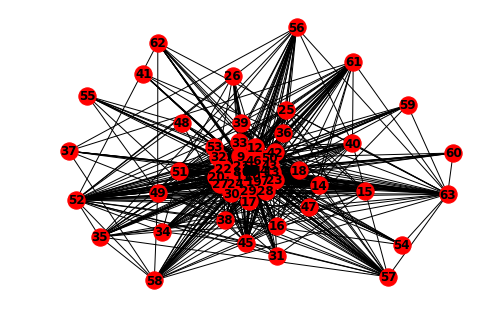

In [22]:
fh = open("eco-everglades.edges","rb")
G = nx.read_weighted_edgelist(fh)
fh.close()

nx.draw_spring(G,with_labels = True, font_weight="bold")

### Analysis

#### Diameter

Now that the graph has been loaded and previewed, we can conduct some analysis. The first statistic we calculated was the diameter. The diameter is defined as the greatest distance between two nodes in a graph, only including the shortest paths between each pair of nodes. This statistic is a good way to measure the overall connectedness of the graph. If the diameter is small, that means that the nodes in the graph are tightly clustered together and each node is connected to many other nodes. If the diameter is larger, that means that there is at least one node that is sparsely linked to other nodes and does not share many connections. As per the assignment instructions, we calculated the diameter of the graph in the code below.

In [3]:
nx.diameter(G)

3

For a network of 69 nodes, a diameter of 3 is fairly small. It appears that the nodes in this network are fairly well connected to each other. This outcome makes sense from an environmental perspective, where different organisms in an ecosystem strongly depend on each other to maintain the ecological balance of energy production and consumption. Another way that the diameter can be interpreted is through the concept of trophic levels. For an ecosystem of this size, there is only enough energy production to support three trophic levels: primary producers (first level) being consumed by primary consumers (second level) being consumed by predators (third level). 

#### Centrality Measures

One of the advantages of network analysis is that it adds another layer of analysis through centrality measures. Centrality measures are a way of measuring how important or influential nodes are in a network. Depending on what a researcher considers "important" will determine which centrality measurement will be most relevant for them. In this case, we may consider a node important if it connects to a large number of other nodes, which indicates that a specific species contributes significantly to the trophic energy transfer in this particular ecosystem. To measure this, we can use the `degree_centrality()` function.

The code below calculates the eigenvector centrality, degree centrality, betweenness centrality, and closeness centrality of each node in the network. The second chunk puts all the centrality measures into a pandas dataframe and sorts them by degree centrality.

In [30]:
EVC = nx.eigenvector_centrality(G)
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

Centrality_df = pd.DataFrame([EVC,degree,betweenness,closeness]).T
Centrality_df = Centrality_df.rename(index = str, columns = {0:"Eigenvector Centrality",
                                                             1:"Degree Centrality",
                                                             2:"Betweenness Centrality",
                                                             3:"Closeness Centrality"})

Centrality_df.sort_values(by=["Degree Centrality"], ascending = False).head()

,Eigenvector Centrality,Degree Centrality,Betweenness Centrality,Closeness Centrality
66,0.222149,0.941176,0.080109,0.944444
69,0.215119,0.926471,0.079972,0.931507
64,0.218723,0.897059,0.065927,0.906667
68,0.195499,0.808824,0.052605,0.839506
10,0.198790,0.735294,0.028121,0.790698


As we can see from the dataframe above, nodes with high degree centrality also appear to have high eigenvector centrality, betweenness centrality, and closeness centrality. This is unsurprising given that nodes will often be influential in other ways if they are connected to many other nodes.

The particular ecosystem features with high measures of centrality are as follows:
- (66) Refractory Detritus
- (69) Miscellaneous Detritus
- (64) Feral Hog
- (68) Vetebrate Detritus
- (10) Hardwood Leaves

It appears that detritus is the part of the ecosystem that connects everything. After all, everything dies eventually, and all that biomass will eventually decompose into the ground somewhere. A little morbid of a conclusion, but death is what connects all living things, as shown by the data.

The plots below show the relationship between degree centrality and the other centrality measures. It is clear that increasing degree centrality will also mean increasing eigenvector centrality, increasing betweenness centrality, and increasing closeness centrality.

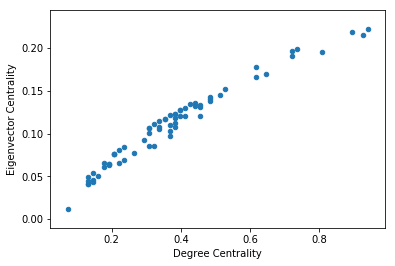

In [31]:
Centrality_df.plot.scatter("Degree Centrality","Eigenvector Centrality")

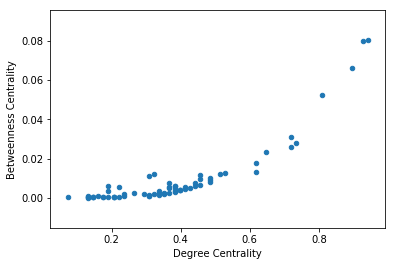

In [32]:
Centrality_df.plot.scatter("Degree Centrality","Betweenness Centrality")

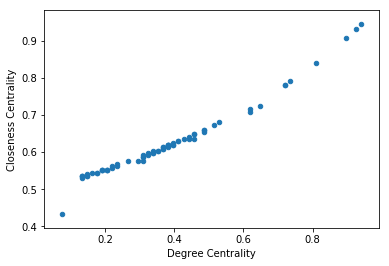

In [34]:
Centrality_df.plot.scatter("Degree Centrality","Closeness Centrality")

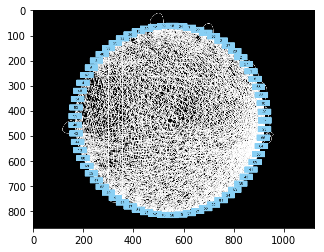

In [40]:
path = "Raw Network.png"
image = mpimg.imread(path)
plt.imshow(image)

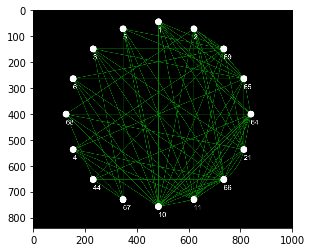

In [41]:
path = "Filtered Network.png"
image = mpimg.imread(path)
plt.imshow(image)